# 1.了解knn算法的思想及其原理

## 1.1 knn算法的核心思想是未标记样本的类别，由距离其最近的k个邻居投票来决定
## 1.2 优点：准确性高，对异常值和噪声有较高的容忍度
## 1.3 缺点：计算量较大，对内存的需求也较大；另外从算法原理可以看出来，每次对一个未标记样本进行分类时，都需要全部计算一遍距离
## 1.4 算法参数k：参数选择需要数据来决定。k值越大，模型的偏差越大，对噪声数据越不敏感，当k值很大时，可能造成模型欠拟合；k值越小，模型的方差就会越大，当k值太小，就会造成模型过拟合。
## 1.5 算法变种：
### ①增加邻居的权重：可以针对不同的邻居指定不同的距离权重，如距离越近权重越高，通过指定算法的weights参数实现 
### ②使用一定半径内的点取代距离最近的k个点：针对数据采样不均匀的情况--后面看一下scikit-learn的RaidusNeighboursClassifier类


# 2.python代码实现

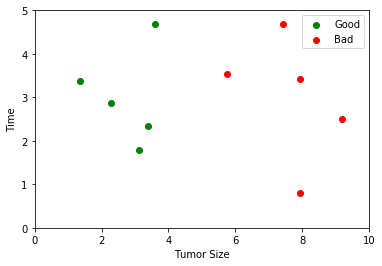

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# raw_data_x是特征，raw_data_y是标签，0为良性，1为恶性
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343853454, 3.368312451],
              [3.582294121, 4.679917921],
              [2.280362211, 2.866990212],
              [7.423436752, 4.685324231],
              [5.745231231, 3.532131321],
              [9.172112222, 2.511113104],
              [7.927841231, 3.421455345],
              [7.939831414, 0.791631213]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
# 设置训练组
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
# 将数据可视化
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], color='g', label = 'Good')
# 0,0第一个0代表类别即raw_data_y中的值，第二个0代表取raw_data_X中第一列的值
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], color='r', label = 'Bad')
plt.xlabel('Tumor Size')
plt.ylabel('Time')
plt.legend(loc = "best")
# 图例位置：loc 位置
plt.axis([0,10,0,5])
plt.show()

In [23]:
x = [4.20933607318, 3.365731514]

In [24]:
from math import sqrt
distances = []
# 用来记录x到样本数据集中每个点的距离
# for x_train in X_train:
#     d = sqrt(np.sum(x_train - x) ** 2)
#     distances.append(d)
# 使用列表生成器，一行就能搞定，对于x_train中的每一个元素x_train都进行了计算，把结果生成一个列表
distances = [sqrt(np.sum(x_train - x) ** 2) for x_train in X_train]

In [25]:
# 求出点x到每个点的距离列表
distances

[1.8502609951800006,
 2.6834544661800006,
 2.8629016821800004,
 0.6871444548199999,
 2.4277151641800003,
 4.533693395819999,
 1.7022949648199996,
 4.108157738820001,
 3.77422898882,
 1.15639503982]

In [26]:
# 排序，找出距离最小的k个点在样本集中的位置
# 函数np.argsort(array)对一个数组进行排序，返回相应的排序后结果的索引
nearest = np.argsort(distances)

In [27]:
nearest
# 结果含义是：距离最小的点在distances数组中的索引是3（当然位置是第4个）,第二小的点索引是9.。。由近到远是哪些点

array([3, 9, 6, 0, 4, 1, 2, 8, 7, 5], dtype=int64)

In [28]:
#选k值，暂定为6（top6），并记录标签值
k = 6
topK_y = [y_train[i] for i in nearest[:k]]

In [29]:
topK_y

[0, 1, 1, 0, 0, 0]

In [30]:
#进入投票环节，找到与测试样本点最近的6个训练样本点的标签y是什么，查不同类别的点有多少个
from collections import Counter
votes = Counter(topK_y)

In [31]:
# 一个字典，原数组中值为0的个数为4，值为1的个数为2
votes

Counter({0: 4, 1: 2})

In [32]:
#Counter.most_common(n) 找出票数最多的n个元素，返回的是一个列表，
#列表中的每个元素是一个元组，元组中第一个元素是对应的元素是谁，第二个元素是频次
votes.most_common(1)

[(0, 4)]

In [33]:
# 此处预测点的标签值即为k个训练样本点中较多数相同标签值点的标签值
predict_y = votes.most_common(1)[0][0]
predict_y

0

In [34]:
#得到预测的y值是0 --'Good'

## 调用kNN.py
(python的绝对路径与相对路径还要注意一下)

In [35]:
from kNN import *

In [36]:
knn_clf = kNNClassifier(k==6)
knn_clf.fit(X_train, y_train)
X_predict = np.array(x).reshape(1, -1)
# ndarray.reshape()在不改变数组值的情况下改变形状， -1代表缺省值由数组根据已经确定的行（或列）数后自动调整
y_predict = knn_clf.predict(X_predict)

In [37]:
y_predict

array([0])

# 3.使用sklearn库

In [40]:
from sklearn.neighbors import KNeighborsClassifier # 创建kNN_classifier实例
kNN_classifier = KNeighborsClassifier(n_neighbors=6) # kNN_classifier做一遍fit（拟合）的过程，模型就存储在kNN_classifier实例中
kNN_classifier.fit(X_train, y_train) # kNN进行预测predict，需要传入一个矩阵，而不能是一个数组。reshape()成一个二维数组，第一个参数是1表示只有一个数据，第二个参数-1，numpy自动决定第二维度有多少

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

## 3.1 sklearn.neighbors.KNeighborsClassifier参数详解

## sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)

### n_neighbors: int, 可选参数(默认为 5)。用于kneighbors查询的默认邻居的数量

### weights（权重）: str or callable(自定义类型), 可选参数(默认为 ‘uniform’)。用于预测的权重参数，可选参数如下：

#### uniform : 统一的权重. 在每一个邻居区域里的点的权重都是一样的。

#### distance : 权重点等于他们距离的倒数。使用此函数，更近的邻居对于所预测的点的影响更大。

#### [callable] : 一个用户自定义的方法，此方法接收一个距离的数组，然后返回一个相同形状并且包含权重的数组。

### algorithm（算法）: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, 可选参数（默认为 ‘auto’）。计算最近邻居用的算法：

#### ball_tree 使用算法BallTree

#### kd_tree 使用算法KDTree

#### brute 使用暴力搜索

#### auto 会基于传入fit方法的内容，选择最合适的算法。

##### 注意 : 如果传入fit方法的输入是稀疏的，将会重载参数设置，直接使用暴力搜索。

### leaf_size（叶子数量）: int, 可选参数(默认为 30)。传入BallTree或者KDTree算法的叶子数量。此参数会影响构建、查询BallTree或者KDTree的速度，以及存储BallTree或者KDTree所需要的内存大小。此可选参数根据是否是问题所需选择性使用。

### p: integer, 可选参数(默认为 2)。用于Minkowski metric（闵可夫斯基空间）的超参数。p = 1, 相当于使用曼哈顿距离，p = 2, 相当于使用欧几里得距离]，对于任何 p ，使用的是闵可夫斯基空间。

### metric（矩阵）: string or callable, 默认为 ‘minkowski’。用于树的距离矩阵。默认为闵可夫斯基空间，如果和p=2一块使用相当于使用标准欧几里得矩阵. 所有可用的矩阵列表请查询 DistanceMetric 的文档。

### metric_params（矩阵参数）: dict, 可选参数(默认为 None)。给矩阵方法使用的其他的关键词参数。

### n_jobs: int, 可选参数(默认为 1)。用于搜索邻居的，可并行运行的任务数量。如果为-1, 任务数量设置为CPU核的数量。不会影响fit

In [39]:
y_predict = kNN_classifier.predict(np.array(x).reshape(1, -1))
y_predict

array([0])

## 3.2 KNeighborsClassifier方法

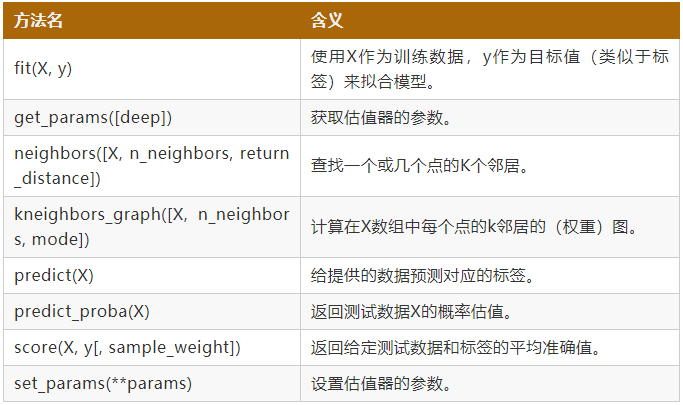

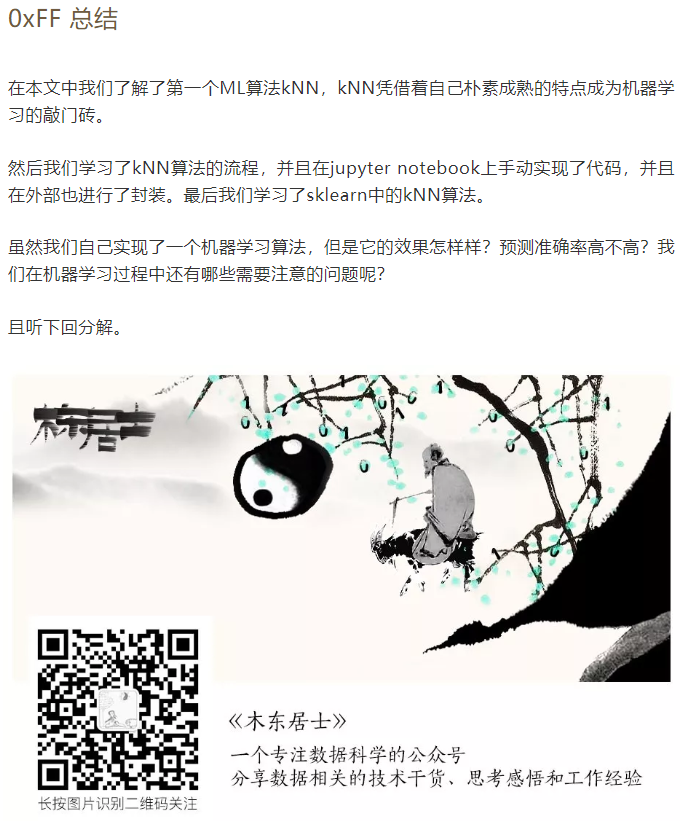